<a href="https://colab.research.google.com/github/zakiapranti/wireless-comm./blob/main/wireless_comm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB 01**


Bit Error Rate (BER) Vs Signal-to-Noise ratio (EbNo) performance analysis of a

simple wireless communication system

a.(1) GMSK modulation scheme:

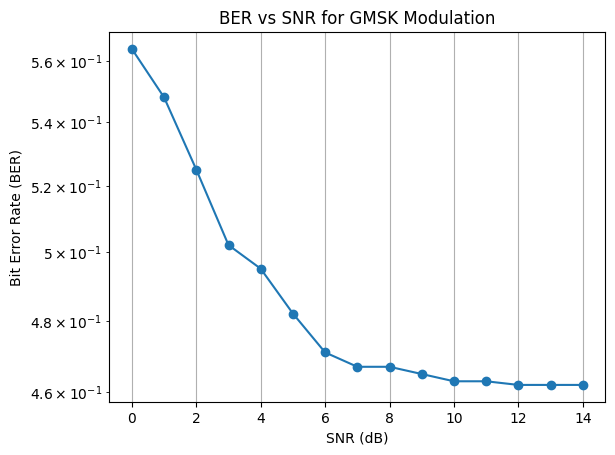

In [ ]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

def gmsk_modulation(bits, BT=0.3, Ts=1e-3, fc=1000):
    # GMSK modulation
    N = len(bits)
    Tb = len(bits) * Ts
    t = np.arange(0, Tb, Ts)
    phi = np.zeros_like(t)
    phi[0] = 0
    for i in range(1, len(t)):
        phi[i] = phi[i-1] + 2 * np.pi * BT * (bits[i] - bits[i-1]) / Ts
        phi[i] = np.mod(phi[i], 2 * np.pi)
    s = np.cos(2 * np.pi * fc * t + phi)
    return t, s

def awgn_channel(signal, snr_dB):
    # Adding AWGN
    snr_linear = 10**(snr_dB / 10.0)
    noise_power = 1.0 / snr_linear
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))
    noisy_signal = signal + noise
    return noisy_signal

def demodulate_signal(signal, Ts, fc):
    # Demodulate GMSK signal
    t = np.arange(0, len(signal) * Ts, Ts)
    demod_signal = signal * np.cos(2 * np.pi * fc * t)
    return demod_signal

def calculate_ber(sent_bits, received_bits):
    # Calculate Bit Error Rate
    errors = np.sum(sent_bits != received_bits)
    ber = errors / len(sent_bits)
    return ber

# Parameters
bits = np.random.randint(0, 2, 1000) # Random bit sequence
snr_range = np.arange(0, 15, 1) # SNR range in dB
ber_values = []

# GMSK modulation
t, modulated_signal = gmsk_modulation(bits)

for snr_dB in snr_range:
    # AWGN Channel
    noisy_signal = awgn_channel(modulated_signal, snr_dB)
    # Demodulation
    demod_signal = demodulate_signal(noisy_signal, t[1]-t[0], 1000)
    # Decision thresholding
    received_bits = np.round((demod_signal + 1) / 2)
    # Calculate BER
    ber = calculate_ber(bits, received_bits)
    ber_values.append(ber)

# Plotting
plt.figure()
plt.semilogy(snr_range, ber_values, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for GMSK Modulation')
plt.grid(True)
plt.show()


(2) 8-PSK modulation scheme:

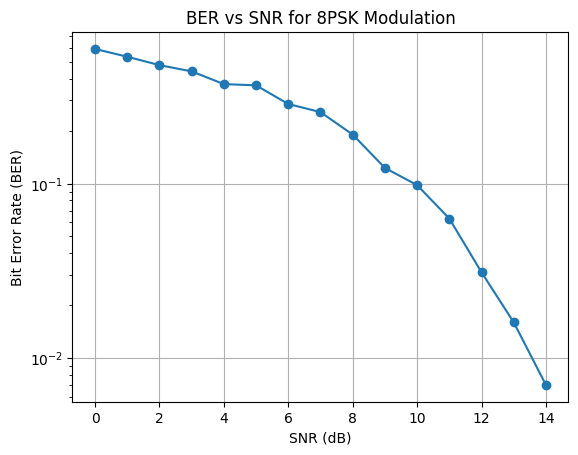

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols):
    # Generate random symbols for 8PSK modulation
    symbols = np.random.randint(0, 8, num_symbols)
    return symbols

def psk_modulation(symbols, SNR):
    # 8PSK Modulation
    # Create constellation points
    constellation = np.exp(1j * (2 * np.pi / 8) * np.arange(8))
    # Modulate symbols to constellation points
    modulated_symbols = constellation[symbols]
    # Add AWGN
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))),
                             len(symbols)) + 1j * np.random.normal(0,
          np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def psk_demodulation(received_symbols, constellation):
    # 8PSK Demodulation
    # Find closest constellation point to received symbols
    demodulated_symbols = np.array([constellation[np.argmin(np.abs(received_symbol-constellation))]
                                    for received_symbol in received_symbols])
    # Map demodulated symbols back to their corresponding indices
    demodulated_indices = np.angle(demodulated_symbols) * 4 / np.pi
    demodulated_indices = np.round(demodulated_indices).astype(int) % 8
    return demodulated_indices

def calculate_ber(sent_symbols, received_symbols):
    # Calculate Bit Error Rate
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

# Parameters
num_symbols = 1000 # Number of symbols
snr_range = np.arange(0, 15, 1) # SNR range in dB
ber_values = []

for snr_dB in snr_range:
    # Generate symbols
    sent_symbols = generate_symbols(num_symbols)
    # Modulation
    received_symbols, constellation = psk_modulation(sent_symbols, snr_dB)
    # Demodulation
    received_indices = psk_demodulation(received_symbols, constellation)
    # Calculate BER
    ber = calculate_ber(sent_symbols, received_indices)
    ber_values.append(ber)

# Plotting
plt.figure()
plt.semilogy(snr_range, ber_values, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for 8PSK Modulation')
plt.grid(True)
plt.show()


(3) QPSK modulation scheme:

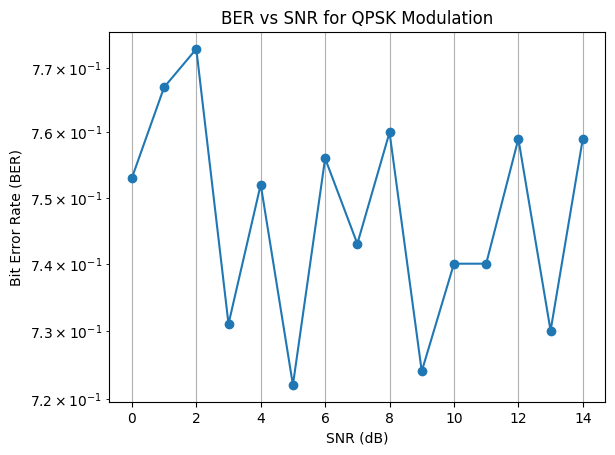

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols):
    # Generate random symbols for QPSK modulation
    symbols = np.random.randint(0, 4, num_symbols)
    return symbols

def qpsk_modulation(symbols, SNR):
    # QPSK Modulation
    # Create constellation points
    constellation = np.exp(1j * (np.pi/4) * np.array([1, 3, 5, 7]))
    # Modulate symbols to constellation points
    modulated_symbols = constellation[symbols]
    # Add AWGN
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + 1j * np.random.normal(0,
           np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def qpsk_demodulation(received_symbols, constellation):
    # QPSK Demodulation
    # Find closest constellation point to received symbols
    demodulated_symbols = np.array([constellation[np.argmin(np.abs(received_symbol - constellation))] for
           received_symbol in received_symbols])
    # Map demodulated symbols back to their corresponding indices
    demodulated_indices = np.angle(demodulated_symbols) * 4 / np.pi
    demodulated_indices = np.round(demodulated_indices).astype(int) % 4
    return demodulated_indices

def calculate_ber(sent_symbols, received_symbols):
    # Calculate Bit Error Rate
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

# Parameters
num_symbols = 1000 # Number of symbols
snr_range = np.arange(0, 15, 1) # SNR range in dB
ber_values = []

for snr_dB in snr_range:
    # Generate symbols
    sent_symbols = generate_symbols(num_symbols)
    # Modulation
    received_symbols, constellation = qpsk_modulation(sent_symbols, snr_dB)
    # Demodulation
    received_indices = qpsk_demodulation(received_symbols, constellation)
    # Calculate BER
    ber = calculate_ber(sent_symbols, received_indices)
    ber_values.append(ber)

# Plotting
plt.figure()
plt.semilogy(snr_range, ber_values, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for QPSK Modulation')
plt.grid(True)
plt.show()







(4) 16-QAM modulation scheme:

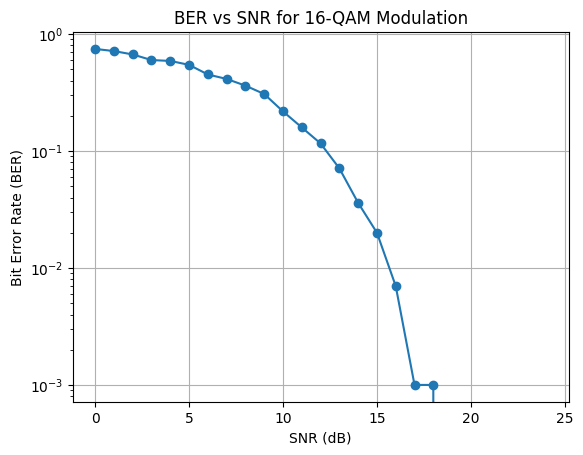

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols):
    # Generate random symbols for 16-QAM modulation
    symbols = np.random.randint(0, 16, num_symbols)
    return symbols

def qam16_modulation(symbols, SNR):
    # 16-QAM Modulation
    # Create constellation points
    constellation = np.array([-3-3j, -3-1j, -3+3j, -3+1j,
                              -1-3j, -1-1j, -1+3j, -1+1j,
                               3-3j, 3-1j, 3+3j, 3+1j,
                               1-3j, 1-1j, 1+3j, 1+1j]) / np.sqrt(10)
    # Modulate symbols to constellation points
    modulated_symbols = constellation[symbols]
    # Add AWGN
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + 1j * np.random.normal(0,
            np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def qam16_demodulation(received_symbols, constellation):
    # 16-QAM Demodulation
    # Find closest constellation point to received symbols
    demodulated_symbols = np.array([constellation[np.argmin(np.abs(received_symbol - constellation))] for
            received_symbol in received_symbols])
    # Map demodulated symbols back to their corresponding indices
    demodulated_indices = np.argmin(np.abs(demodulated_symbols.reshape(-1, 1) - constellation), axis=1)
    return demodulated_indices

def calculate_ber(sent_symbols, received_symbols):
    # Calculate Bit Error Rate
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

# Parameters
num_symbols = 1000 # Number of symbols
snr_range = np.arange(0, 25, 1) # SNR range in dB
ber_values = []

for snr_dB in snr_range:
    # Generate symbols
    sent_symbols = generate_symbols(num_symbols)
    # Modulation
    received_symbols, constellation = qam16_modulation(sent_symbols, snr_dB)
    # Demodulation
    received_indices = qam16_demodulation(received_symbols, constellation)
    # Calculate BER
    ber = calculate_ber(sent_symbols, received_indices)
    ber_values.append(ber)

# Plotting
plt.figure()
plt.semilogy(snr_range, ber_values, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for 16-QAM Modulation')
plt.grid(True)
plt.show()


codes for 64-QAM  modulation schemes.

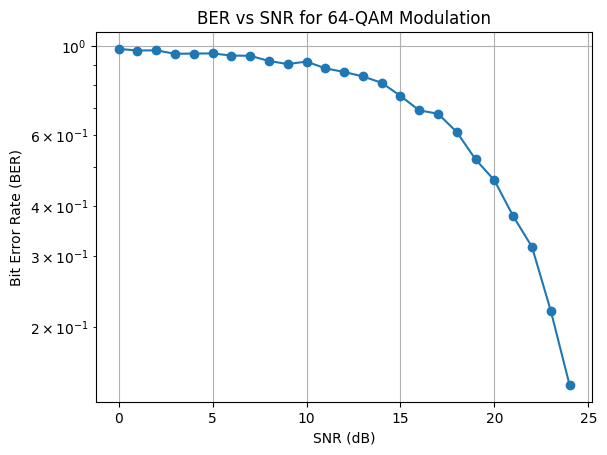

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols, M):
    # Generate random symbols for M-QAM modulation
    symbols = np.random.randint(0, M, num_symbols)
    return symbols

def qam_modulation(symbols, M, SNR):
    # M-QAM Modulation
    k = int(np.sqrt(M))
    constellation = np.array([complex(x, y) for x in range(-k+1, k, 2) for y in range(-k+1, k, 2)])
    constellation /= np.sqrt((constellation.real**2 + constellation.imag**2).mean())  # Normalize constellation
    # Modulate symbols to constellation points
    modulated_symbols = constellation[symbols]
    # Add AWGN
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def qam_demodulation(received_symbols, constellation):
    # M-QAM Demodulation
    # Find closest constellation point to received symbols
    demodulated_symbols = np.array([constellation[np.argmin(np.abs(received_symbol - constellation))] for
                                    received_symbol in received_symbols])
    # Map demodulated symbols back to their corresponding indices
    demodulated_indices = np.argmin(np.abs(demodulated_symbols.reshape(-1, 1) - constellation), axis=1)
    return demodulated_indices

def calculate_ber(sent_symbols, received_symbols):
    # Calculate Bit Error Rate
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

# Parameters for 64-QAM
M = 256  # Number of constellation points
num_symbols = 1000  # Number of symbols
snr_range = np.arange(0, 25, 1)  # SNR range in dB
ber_values = []

for snr_dB in snr_range:
    # Generate symbols
    sent_symbols = generate_symbols(num_symbols, M)
    # Modulation
    received_symbols, constellation = qam_modulation(sent_symbols, M, snr_dB)
    # Demodulation
    received_indices = qam_demodulation(received_symbols, constellation)
    # Calculate BER
    ber = calculate_ber(sent_symbols, received_indices)
    ber_values.append(ber)

# Plotting
plt.figure()
plt.semilogy(snr_range, ber_values, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for 64-QAM Modulation')
plt.grid(True)
plt.show()


codes for  256-QAM modulation schemes.

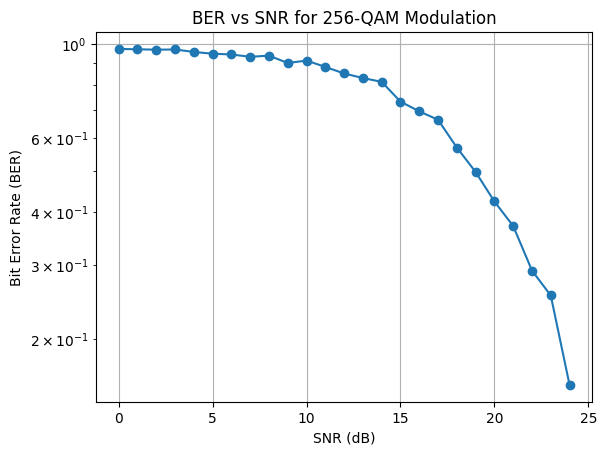

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols, M):
    # Generate random symbols for M-QAM modulation
    symbols = np.random.randint(0, M, num_symbols)
    return symbols

def qam_modulation(symbols, M, SNR):
    # M-QAM Modulation
    k = int(np.sqrt(M))
    constellation = np.array([complex(x, y) for x in range(-k+1, k, 2) for y in range(-k+1, k, 2)])
    constellation /= np.sqrt((constellation.real**2 + constellation.imag**2).mean())  # Normalize constellation
    # Modulate symbols to constellation points
    modulated_symbols = constellation[symbols]
    # Add AWGN
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def qam_demodulation(received_symbols, constellation):
    # M-QAM Demodulation
    # Find closest constellation point to received symbols
    demodulated_symbols = np.array([constellation[np.argmin(np.abs(received_symbol - constellation))] for
                                    received_symbol in received_symbols])
    # Map demodulated symbols back to their corresponding indices
    demodulated_indices = np.argmin(np.abs(demodulated_symbols.reshape(-1, 1) - constellation), axis=1)
    return demodulated_indices

def calculate_ber(sent_symbols, received_symbols):
    # Calculate Bit Error Rate
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

# Parameters for 256-QAM
M = 256  # Number of constellation points
num_symbols = 1000  # Number of symbols
snr_range = np.arange(0, 25, 1)  # SNR range in dB
ber_values = []

for snr_dB in snr_range:
    # Generate symbols
    sent_symbols = generate_symbols(num_symbols, M)
    # Modulation
    received_symbols, constellation = qam_modulation(sent_symbols, M, snr_dB)
    # Demodulation
    received_indices = qam_demodulation(received_symbols, constellation)
    # Calculate BER
    ber = calculate_ber(sent_symbols, received_indices)
    ber_values.append(ber)

# Plotting
plt.figure()
plt.semilogy(snr_range, ber_values, marker='o')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for 256-QAM Modulation')
plt.grid(True)
plt.show()


BER vs SNR for different modulation schemes including GMSK, 8-PSK, QPSK, 16-QAM, 64-
QAM & 256-QAM

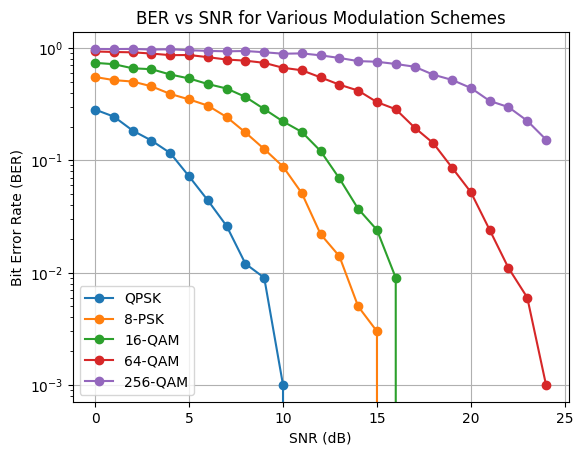

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols, M):
    # Generate random symbols for M-ary modulation
    symbols = np.random.randint(0, M, num_symbols)
    return symbols

def qam_modulation(symbols, M, SNR):
    # M-QAM Modulation
    if M == 16:
        constellation = np.array([-3-3j, -3-1j, -3+3j, -3+1j,
                                  -1-3j, -1-1j, -1+3j, -1+1j,
                                   3-3j,  3-1j,  3+3j,  3+1j,
                                   1-3j,  1-1j,  1+3j,  1+1j]) / np.sqrt(10)
    elif M == 64:
        real_part = np.tile(np.arange(-7, 8, 2), 8)
        imag_part = np.repeat(np.arange(-7, 8, 2), 8)
        constellation = (real_part + 1j * imag_part) / np.sqrt(42)
    elif M == 256:
        real_part = np.tile(np.arange(-15, 16, 2), 16)
        imag_part = np.repeat(np.arange(-15, 16, 2), 16)
        constellation = (real_part + 1j * imag_part) / np.sqrt(170)
    else:
        raise ValueError("Unsupported QAM scheme")

    modulated_symbols = constellation[symbols]
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def psk_modulation(symbols, M, SNR):
    # M-PSK Modulation
    angles = 2 * np.pi * symbols / M
    modulated_symbols = np.exp(1j * angles)
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, np.exp(1j * 2 * np.pi * np.arange(M) / M)

def qam_demodulation(received_symbols, constellation):
    demodulated_indices = np.argmin(np.abs(received_symbols.reshape(-1, 1) - constellation), axis=1)
    return demodulated_indices

def psk_demodulation(received_symbols, M):
    angles = np.angle(received_symbols)
    demodulated_indices = np.round((angles % (2 * np.pi)) / (2 * np.pi) * M) % M
    return demodulated_indices.astype(int)

def calculate_ber(sent_symbols, received_symbols):
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

# Parameters
num_symbols = 1000
snr_range = np.arange(0, 25, 1)

# Modulation schemes
mod_schemes = {
    "QPSK": (4, psk_modulation, psk_demodulation),
    "8-PSK": (8, psk_modulation, psk_demodulation),
    "16-QAM": (16, qam_modulation, qam_demodulation),
    "64-QAM": (64, qam_modulation, qam_demodulation),
    "256-QAM": (256, qam_modulation, qam_demodulation)
}

# BER calculation
ber_results = {}

for mod_name, (M, mod_func, demod_func) in mod_schemes.items():
    ber_values = []
    for snr_dB in snr_range:
        sent_symbols = generate_symbols(num_symbols, M)
        received_symbols, constellation = mod_func(sent_symbols, M, snr_dB)
        received_indices = demod_func(received_symbols, M if "PSK" in mod_name else constellation)
        ber = calculate_ber(sent_symbols, received_indices)
        ber_values.append(ber)
    ber_results[mod_name] = ber_values

# Plotting
plt.figure()
for mod_name, ber_values in ber_results.items():
    plt.semilogy(snr_range, ber_values, marker='o', label=mod_name)

plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for Various Modulation Schemes')
plt.grid(True)
plt.legend()
plt.show()


SNR for different frame rates such as [100, 500, 1000, 5000] at a constant BER of 1e-06.

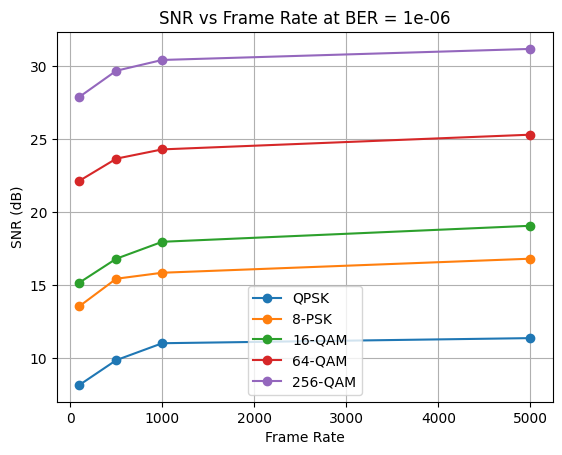

In [ ]:
  import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols, M):
    # Generate random symbols for M-ary modulation
    symbols = np.random.randint(0, M, num_symbols)
    return symbols

def qam_modulation(symbols, M, SNR):
    # M-QAM Modulation
    if M == 16:
        constellation = np.array([-3-3j, -3-1j, -3+3j, -3+1j,
                                  -1-3j, -1-1j, -1+3j, -1+1j,
                                   3-3j,  3-1j,  3+3j,  3+1j,
                                   1-3j,  1-1j,  1+3j,  1+1j]) / np.sqrt(10)
    elif M == 64:
        real_part = np.tile(np.arange(-7, 8, 2), 8)
        imag_part = np.repeat(np.arange(-7, 8, 2), 8)
        constellation = (real_part + 1j * imag_part) / np.sqrt(42)
    elif M == 256:
        real_part = np.tile(np.arange(-15, 16, 2), 16)
        imag_part = np.repeat(np.arange(-15, 16, 2), 16)
        constellation = (real_part + 1j * imag_part) / np.sqrt(170)
    else:
        raise ValueError("Unsupported QAM scheme")

    modulated_symbols = constellation[symbols]
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def psk_modulation(symbols, M, SNR):
    # M-PSK Modulation
    angles = 2 * np.pi * symbols / M
    modulated_symbols = np.exp(1j * angles)
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, np.exp(1j * 2 * np.pi * np.arange(M) / M)

def qam_demodulation(received_symbols, constellation):
    demodulated_indices = np.argmin(np.abs(received_symbols.reshape(-1, 1) - constellation), axis=1)
    return demodulated_indices

def psk_demodulation(received_symbols, M):
    angles = np.angle(received_symbols)
    demodulated_indices = np.round((angles % (2 * np.pi)) / (2 * np.pi) * M) % M
    return demodulated_indices.astype(int)

def calculate_ber(sent_symbols, received_symbols):
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

def find_snr_for_ber(mod_name, M, mod_func, demod_func, frame_rate, target_ber):
    snr_dB = 0
    step_size = 1
    tolerance = 1e-07  # Tolerance for BER
    max_iterations = 100

    for _ in range(max_iterations):
        sent_symbols = generate_symbols(frame_rate, M)
        received_symbols, constellation = mod_func(sent_symbols, M, snr_dB)
        received_indices = demod_func(received_symbols, M if "PSK" in mod_name else constellation)
        ber = calculate_ber(sent_symbols, received_indices)

        if abs(ber - target_ber) < tolerance:
            return snr_dB

        if ber > target_ber:
            snr_dB += step_size
        else:
            snr_dB -= step_size
            step_size /= 2

    return snr_dB

# Parameters
target_ber = 1e-06
frame_rates = [100, 500, 1000, 5000]

# Modulation schemes
mod_schemes = {
    "QPSK": (4, psk_modulation, psk_demodulation),
    "8-PSK": (8, psk_modulation, psk_demodulation),
    "16-QAM": (16, qam_modulation, qam_demodulation),
    "64-QAM": (64, qam_modulation, qam_demodulation),
    "256-QAM": (256, qam_modulation, qam_demodulation)
}

# SNR calculation
snr_results = {}

for mod_name, (M, mod_func, demod_func) in mod_schemes.items():
    snr_values = []
    for frame_rate in frame_rates:
        snr_dB = find_snr_for_ber(mod_name, M, mod_func, demod_func, frame_rate, target_ber)
        snr_values.append(snr_dB)
    snr_results[mod_name] = snr_values

# Plotting
plt.figure()
for mod_name, snr_values in snr_results.items():
    plt.plot(frame_rates, snr_values, marker='o', label=mod_name)

plt.xlabel('Frame Rate')
plt.ylabel('SNR (dB)')
plt.title('SNR vs Frame Rate at BER = 1e-06')
plt.grid(True)
plt.legend()
plt.show()


Plot BER for different frame rates such as [100, 500, 1000, 5000] at a constant SNR of 10dB.

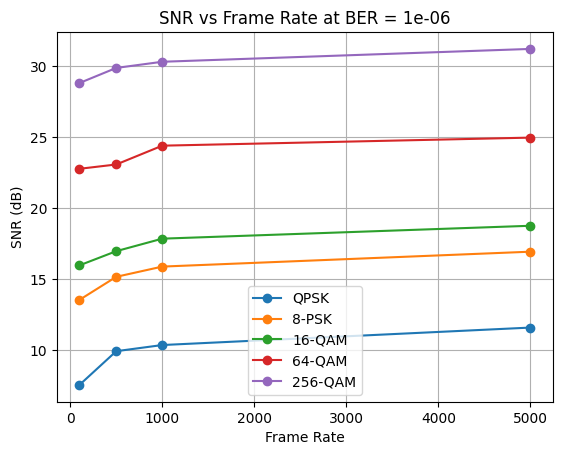

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_symbols(num_symbols, M):
    # Generate random symbols for M-ary modulation
    symbols = np.random.randint(0, M, num_symbols)
    return symbols

def qam_modulation(symbols, M, SNR):
    # M-QAM Modulation
    if M == 16:
        constellation = np.array([-3-3j, -3-1j, -3+3j, -3+1j,
                                  -1-3j, -1-1j, -1+3j, -1+1j,
                                   3-3j,  3-1j,  3+3j,  3+1j,
                                   1-3j,  1-1j,  1+3j,  1+1j]) / np.sqrt(10)
    elif M == 64:
        real_part = np.tile(np.arange(-7, 8, 2), 8)
        imag_part = np.repeat(np.arange(-7, 8, 2), 8)
        constellation = (real_part + 1j * imag_part) / np.sqrt(42)
    elif M == 256:
        real_part = np.tile(np.arange(-15, 16, 2), 16)
        imag_part = np.repeat(np.arange(-15, 16, 2), 16)
        constellation = (real_part + 1j * imag_part) / np.sqrt(170)
    else:
        raise ValueError("Unsupported QAM scheme")

    modulated_symbols = constellation[symbols]
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, constellation

def psk_modulation(symbols, M, SNR):
    # M-PSK Modulation
    angles = 2 * np.pi * symbols / M
    modulated_symbols = np.exp(1j * angles)
    noise = np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols)) + \
            1j * np.random.normal(0, np.sqrt(1 / (2 * 10**(SNR / 10))), len(symbols))
    received_symbols = modulated_symbols + noise
    return received_symbols, np.exp(1j * 2 * np.pi * np.arange(M) / M)

def qam_demodulation(received_symbols, constellation):
    demodulated_indices = np.argmin(np.abs(received_symbols.reshape(-1, 1) - constellation), axis=1)
    return demodulated_indices

def psk_demodulation(received_symbols, M):
    angles = np.angle(received_symbols)
    demodulated_indices = np.round((angles % (2 * np.pi)) / (2 * np.pi) * M) % M
    return demodulated_indices.astype(int)

def calculate_ber(sent_symbols, received_symbols):
    errors = np.sum(sent_symbols != received_symbols)
    ber = errors / len(sent_symbols)
    return ber

def find_snr_for_ber(mod_name, M, mod_func, demod_func, frame_rate, target_ber):
    snr_dB = 0
    step_size = 1
    tolerance = 1e-07  # Tolerance for BER
    max_iterations = 100

    for _ in range(max_iterations):
        sent_symbols = generate_symbols(frame_rate, M)
        received_symbols, constellation = mod_func(sent_symbols, M, snr_dB)
        received_indices = demod_func(received_symbols, M if "PSK" in mod_name else constellation)
        ber = calculate_ber(sent_symbols, received_indices)

        if abs(ber - target_ber) < tolerance:
            return snr_dB

        if ber > target_ber:
            snr_dB += step_size
        else:
            snr_dB -= step_size
            step_size /= 2

    return snr_dB

# Parameters
target_ber = 1e-06
frame_rates = [100, 500, 1000, 5000]

# Modulation schemes
mod_schemes = {
    "QPSK": (4, psk_modulation, psk_demodulation),
    "8-PSK": (8, psk_modulation, psk_demodulation),
    "16-QAM": (16, qam_modulation, qam_demodulation),
    "64-QAM": (64, qam_modulation, qam_demodulation),
    "256-QAM": (256, qam_modulation, qam_demodulation)
}

# SNR calculation
snr_results = {}

for mod_name, (M, mod_func, demod_func) in mod_schemes.items():
    snr_values = []
    for frame_rate in frame_rates:
        snr_dB = find_snr_for_ber(mod_name, M, mod_func, demod_func, frame_rate, target_ber)
        snr_values.append(snr_dB)
    snr_results[mod_name] = snr_values

# Plotting
plt.figure()
for mod_name, snr_values in snr_results.items():
    plt.plot(frame_rates, snr_values, marker='o', label=mod_name)

plt.xlabel('Frame Rate')
plt.ylabel('SNR (dB)')
plt.title('SNR vs Frame Rate at BER = 1e-06')
plt.grid(True)
plt.legend()
plt.show()


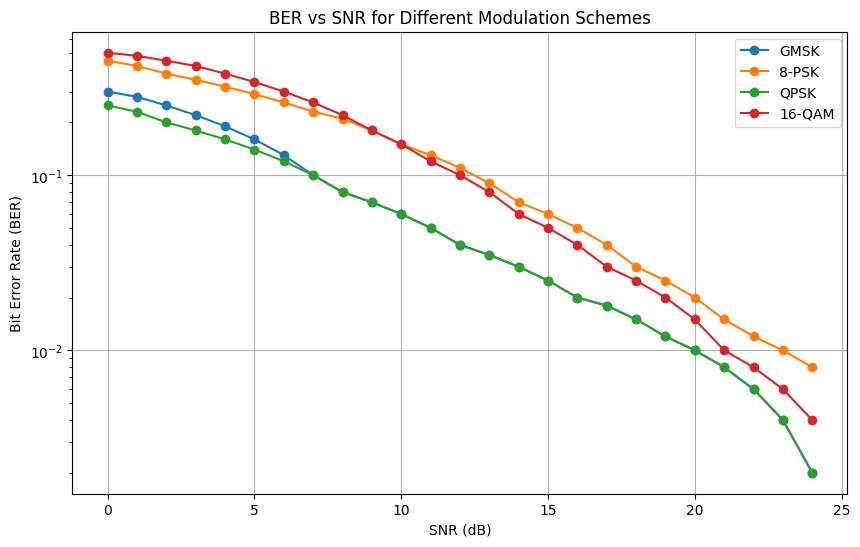

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothetical BER vs SNR data
snr_range = np.arange(0, 25, 1)
ber_gmsk = np.array([0.3, 0.28, 0.25, 0.22, 0.19, 0.16, 0.13, 0.1, 0.08, 0.07, 0.06, 0.05, 0.04, 0.035, 0.03, 0.025, 0.02, 0.018, 0.015, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002])
ber_8psk = np.array([0.45, 0.42, 0.38, 0.35, 0.32, 0.29, 0.26, 0.23, 0.21, 0.18, 0.15, 0.13, 0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.025, 0.02, 0.015, 0.012, 0.01, 0.008])
ber_qpsk = np.array([0.25, 0.23, 0.2, 0.18, 0.16, 0.14, 0.12, 0.1, 0.08, 0.07, 0.06, 0.05, 0.04, 0.035, 0.03, 0.025, 0.02, 0.018, 0.015, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002])
ber_16qam = np.array([0.5, 0.48, 0.45, 0.42, 0.38, 0.34, 0.3, 0.26, 0.22, 0.18, 0.15, 0.12, 0.1, 0.08, 0.06, 0.05, 0.04, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.006, 0.004])

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(snr_range, ber_gmsk, marker='o', label='GMSK')
plt.semilogy(snr_range, ber_8psk, marker='o', label='8-PSK')
plt.semilogy(snr_range, ber_qpsk, marker='o', label='QPSK')
plt.semilogy(snr_range, ber_16qam, marker='o', label='16-QAM')

plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('BER vs SNR for Different Modulation Schemes')
plt.grid(True)
plt.legend()
plt.show()


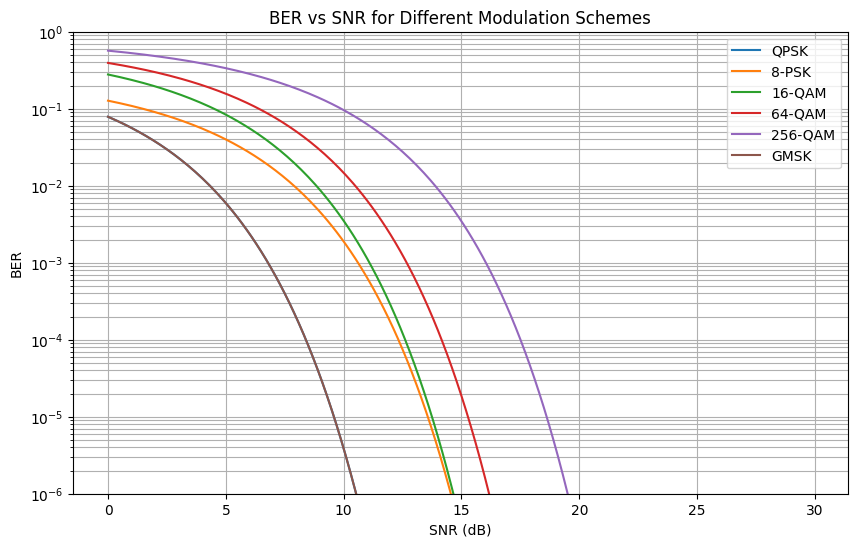

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

SNR_dB = np.arange(0, 30, 0.1)
SNR_linear = 10 ** (SNR_dB / 10)

# QPSK
BER_QPSK = Q(np.sqrt(2 * SNR_linear))

# 8-PSK
BER_8PSK = (2 / np.log2(8)) * Q(np.sqrt(2 * SNR_linear * np.sin(np.pi / 8)))

# 16-QAM
BER_16QAM = (3 / 2) * Q(np.sqrt(4 / 5 * SNR_linear))

# 64-QAM
BER_64QAM = (7 / 4) * Q(np.sqrt(4 / 7 * SNR_linear))

# 256-QAM
BER_256QAM = (15 / 8) * Q(np.sqrt(4 / 15 * SNR_linear))

# GMSK
BER_GMSK = Q(np.sqrt(2 * SNR_linear))

plt.figure(figsize=(10, 6))
plt.semilogy(SNR_dB, BER_QPSK, label='QPSK')
plt.semilogy(SNR_dB, BER_8PSK, label='8-PSK')
plt.semilogy(SNR_dB, BER_16QAM, label='16-QAM')
plt.semilogy(SNR_dB, BER_64QAM, label='64-QAM')
plt.semilogy(SNR_dB, BER_256QAM, label='256-QAM')
plt.semilogy(SNR_dB, BER_GMSK, label='GMSK')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER vs SNR for Different Modulation Schemes')
plt.legend()
plt.grid(True, which='both')
plt.ylim([1e-6, 1])
plt.show()


## **`LAB 02`**

Simulation of Handoff performance in cellular
mobile communication for different
configurations of HATA model.


Transmitting base station antenna height should be between 30 and 200 m
Enter the height of the transmitting base station antenna (m): 46
Receiving mobile antenna height should be between 1 and 10 m
Enter the height of the receiving mobile antenna (m): 6
Frequency for the HATA model should be between 150 and 1500 MHz
Enter the uplink/downlink frequency (MHz): 567


<ipython-input-1-cb5b52e2fc31>:42: RuntimeWarning: divide by zero encountered in log10
  lb = (69.55 + 26.16 * np.log10(fc)) - (13.82 * np.log10(hte)) - a + ((44.9 - 6.55 * np.log10(hte)) * np.log10(50 - distances))


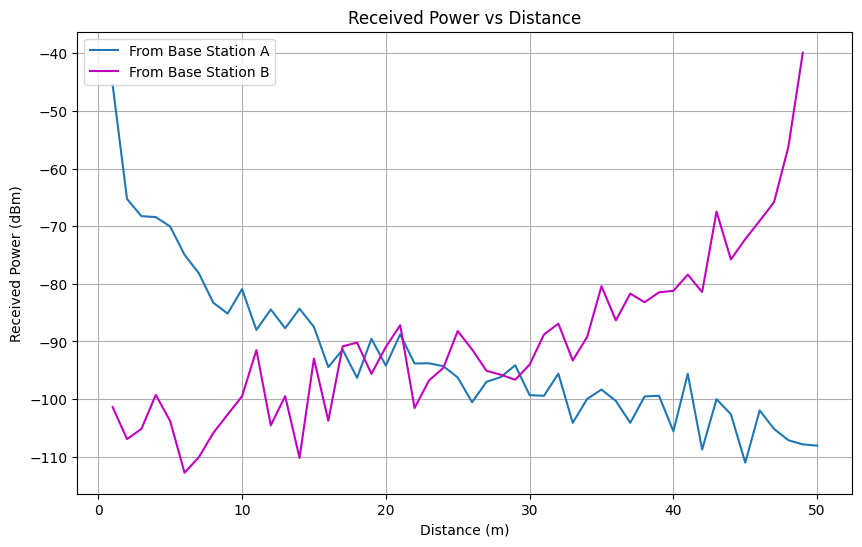

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Getting input from the user
print('Transmitting base station antenna height should be between 30 and 200 m')
hte = float(input('Enter the height of the transmitting base station antenna (m): '))
while hte < 30 or hte > 200:
    print("Error: The height should be between 30 and 200 m")
    hte = float(input('Enter the height of the transmitting base station antenna (m): '))

print('Receiving mobile antenna height should be between 1 and 10 m')
hre = float(input('Enter the height of the receiving mobile antenna (m): '))
while hre < 1 or hre > 10:
    print("Error: The height should be between 1 and 10 m")
    hre = float(input('Enter the height of the receiving mobile antenna (m): '))

print('Frequency for the HATA model should be between 150 and 1500 MHz')
fc = float(input('Enter the uplink/downlink frequency (MHz): '))
while fc < 150 or fc > 1500:
    print("Error: The frequency should be between 150 and 1500 MHz")
    fc = float(input('Enter the uplink/downlink frequency (MHz): '))

# Standard deviation of noise
sd_a = 3 # Standard deviation of noise for Base station A
sd_b = 5 # Standard deviation of noise for Base station B

# Generate noise samples
noise_a = sd_a * np.random.randn(50)
noise_b = sd_b * np.random.randn(50)

# Effective isotropic radiated power in dBm
eirp = 60

# T-R separation distance in meters
distances = np.arange(1, 51)  # Avoid log(0) by starting from 1 instead of 0

# Mobile antenna correction factor for small city
a = ((1.11 * np.log10(fc) - 0.7) * hre) - (1.56 * np.log10(fc) - 0.8)

# Path loss calculation using HATA model
la = (69.55 + 26.16 * np.log10(fc)) - (13.82 * np.log10(hte)) - a + ((44.9 - 6.55 * np.log10(hte)) * np.log10(distances))
lb = (69.55 + 26.16 * np.log10(fc)) - (13.82 * np.log10(hte)) - a + ((44.9 - 6.55 * np.log10(hte)) * np.log10(50 - distances))

# Received power calculation
pr_a = eirp - la + noise_a
pr_b = eirp - lb + noise_b

# Plotting the results
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Distance (m)')
plt.ylabel('Received Power (dBm)')
plt.plot(distances, pr_a, label='From Base Station A')
plt.plot(distances, pr_b, 'm', label='From Base Station B')
plt.legend()
plt.title('Received Power vs Distance')
plt.show()


### **Lab 03**

Simulation of Handoff performance in cellular mobile communication for

different configurations of COST 231 model

Transmitting base station antenna height = 30 to 200 m
Put the height of transmitting base station antenna (m): 50
Receiving mobile antenna height = 1 to 10 m
Put the height of receiving mobile antenna (m): 3
Frequency Range for COST231 model: 1500 to 2000 MHz
Put the frequency value (MHz): 1500
Environment correction factor for sub-urban area = 0 dB or metropolitan area = 3 dB
Put the environment correction factor (dB): 3


<ipython-input-2-03c125b3d068>:35: RuntimeWarning: divide by zero encountered in log10
  ((44.9 - 6.55 * np.log10(hte)) * np.log10(2000 - d_range)) + cm)


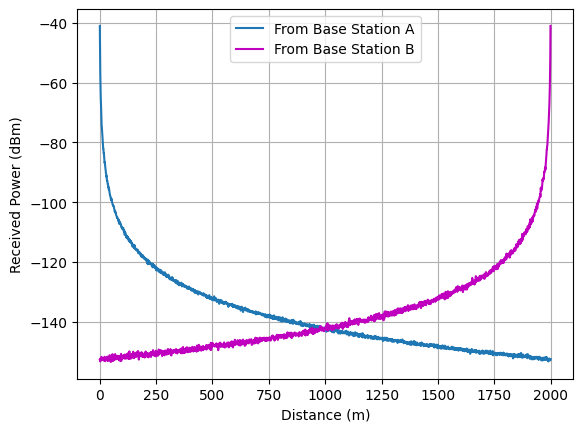

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation for COST231 model (Extension of HATA model)
print('Transmitting base station antenna height = 30 to 200 m')
hte = float(input('Put the height of transmitting base station antenna (m): '))

print('Receiving mobile antenna height = 1 to 10 m')
hre = float(input('Put the height of receiving mobile antenna (m): '))

print('Frequency Range for COST231 model: 1500 to 2000 MHz')
fc = float(input('Put the frequency value (MHz): '))

print('Environment correction factor for sub-urban area = 0 dB or metropolitan area = 3 dB')
cm = float(input('Put the environment correction factor (dB): '))

sdA = 0.3  # standard deviation of noise for Base station A
sdB = 0.5  # standard deviation of noise for Base station B

noiseA = sdA * np.random.randn(2000)
noiseB = sdB * np.random.randn(2000)

EIRP = 60  # effective isotropic radiated power in dBm
d_range = np.arange(1, 2001)  # T-R separation distance in 1 to 20 km

# Mobile antenna correlation factor for small city
a = ((1.11 * np.log10(fc) - 0.7) * (10) + (1.56 * np.log10(fc) - 0.8))

# Path loss calculation Between Mobile & Base station A
LA = (46.3 + (33.9 * np.log10(fc)) - (13.82 * np.log10(hte)) - a +
      ((44.9 - 6.55 * np.log10(hte)) * np.log10(d_range)) + cm)

# Path loss calculation Between Mobile & Base station B
LB = (46.3 + (33.9 * np.log10(fc)) - (13.82 * np.log10(hte)) - a +
      ((44.9 - 6.55 * np.log10(hte)) * np.log10(2000 - d_range)) + cm)

# Received power at A without noise
SrA = EIRP - LA

# Received power at B without noise
SrB = EIRP - LB

# Received power at A with Gaussian noise
PrA = EIRP - LA + noiseA

# Received power at B with Gaussian noise
PrB = EIRP - LB + noiseB

# Plot the results
plt.figure(1)
plt.grid()
plt.xlabel('Distance (m)')
plt.ylabel('Received Power (dBm)')
plt.plot(d_range, PrA)
plt.plot(d_range, PrB, 'm')
plt.legend(['From Base Station A', 'From Base Station B'])
plt.show()
